In [1]:
import astropy.units as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from divtel.telescope import Telescope, Array

In [2]:
file = open("/Users/alicedonini/Lavoro/Divergent/Divergent-Pointing/layout-3AL4M15-5.txt", "r")
#array = Array()
tels = []
for line in file:  
    #split the string on whitespace, return a list of numbers as strings
    coord_str = line.split()
    coord_str[0], coord_str[1], coord_str[2] = float(coord_str[0]), float(coord_str[1]), float(coord_str[2]) 
    coord = [x*u.m for x in coord_str]
    #print(coord_float)
    tel = Telescope(coord[0],coord[1],coord[2],coord[3],coord[4])
    tels.append(tel)
    
array = Array(tels)

for tel in array.telescopes:
    #print(tel.fov)
    print(tel.id)
    #print(tel.position)
    #print(tel.camera_radius)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [3]:
#Define where you want to point (ex. source in the simulation)
az = 180 * u.deg
alt = 70 * u.deg
#Define divergence
div=0.1

#Divergent pointing
np.array(array.divergent_pointing(div, alt, az))
tels_alt = np.array([tel.alt.value for tel in array.telescopes])
tels_az = np.array([tel.az.value for tel in array.telescopes])
print("Az: ", np.degrees(tels_az))
print("Alt: ", np.degrees(tels_alt))
print("barycenter: ", array.barycenter)

#telescopes_distances = np.sqrt(np.sum((array.positions_array - array.barycenter)**2, axis=1))
#p = np.average(array.pointing_vectors, weights=telescopes_distances, axis=0)
#print(np.degrees(p))

Az:  [-174.23139223  164.23521774  159.95120208 -168.75689224  177.11710686
  156.11753673  137.48193743  131.0826303  -131.0650743  -153.29073716
 -162.72378691  136.03249774 -126.08124833 -145.5019946   176.03609733
  147.75106552  166.31620996 -174.64375396 -101.5795781 ]
Alt:  [70.31000197 71.50807239 77.77290631 75.66662694 63.32586802 62.3969927
 70.54846407 81.55327709 76.99704624 67.97662431 62.3921114  60.9314067
 66.67955392 60.13108121 74.06637501 52.96316796 56.69329737 56.71455777
 72.2506478 ]
barycenter:  [-75.7         26.57684211  49.07894737]


In [33]:
#Create tel dictionary with div pointing
tels_dict = {}
for ii, tel in enumerate(array.telescopes, 1):
    #tels_dict[ii] = {'THETA': 90-np.rad2deg(tel.alt.value),
    #                 'PHI': np.rad2deg(np.mod(tel.az.value, 2*np.pi))}
    tels_dict[ii] = {'az': tel.az,
                     'alt': tel.alt}
print(tels_dict)

{1: {'az': <Quantity -3.04091145 rad>, 'alt': <Quantity 1.22714103 rad>}, 2: {'az': <Quantity 2.8664453 rad>, 'alt': <Quantity 1.24805131 rad>}, 3: {'az': <Quantity 2.79167512 rad>, 'alt': <Quantity 1.35739328 rad>}, 4: {'az': <Quantity -2.9453634 rad>, 'alt': <Quantity 1.32063177 rad>}, 5: {'az': <Quantity 3.09127668 rad>, 'alt': <Quantity 1.1052449 rad>}, 6: {'az': <Quantity 2.72476504 rad>, 'alt': <Quantity 1.08903297 rad>}, 7: {'az': <Quantity 2.39951247 rad>, 'alt': <Quantity 1.23130298 rad>}, 8: {'az': <Quantity 2.28782349 rad>, 'alt': <Quantity 1.4233732 rad>}, 9: {'az': <Quantity -2.28751708 rad>, 'alt': <Quantity 1.34385197 rad>}, 10: {'az': <Quantity -2.67542808 rad>, 'alt': <Quantity 1.18641591 rad>}, 11: {'az': <Quantity -2.84006585 rad>, 'alt': <Quantity 1.08894777 rad>}, 12: {'az': <Quantity 2.37421498 rad>, 'alt': <Quantity 1.06345366 rad>}, 13: {'az': <Quantity -2.20053291 rad>, 'alt': <Quantity 1.16377776 rad>}, 14: {'az': <Quantity -2.53948887 rad>, 'alt': <Quantity 1

(-403.96335663082436,
 233.25335663082436,
 -342.23567660044154,
 419.2256766004415)

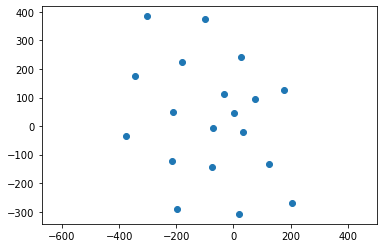

In [29]:
#array plot
plt.scatter(array.positions_array[:,0], array.positions_array[:,1])
plt.axis('equal')

(-342.2303566308244, 419.22035663082437, -403.9686766004415, 233.2586766004415)

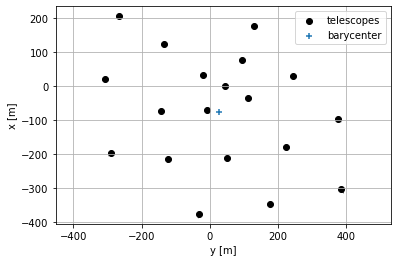

In [30]:
ax = array.display_2d(projection='xy')
ax.legend()
plt.axis('equal')

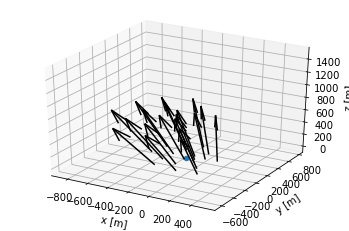

In [31]:
ax = array.display_3d()
fig = ax.scatter(array.barycenter[0], array.barycenter[1], array.barycenter[2])
#plt.savefig("3d.png")


1 -58.70394038051512 -333.51926178107044 -58.703940380515114
1 70.31000196641014 -69.95394705595847 19.59028646637938
2 52.09065548659184 -14.950820556494087 52.09065548659183
2 71.50807239274506 -68.81830862119763 17.796356949569045
3 33.875580024880286 -19.59400807899079 33.875580024880286
3 77.77290631261513 -73.05994493721849 11.486143875758057
4 -41.77802887012121 -337.9006822198446 -41.778028870121204
4 75.66662693754708 -74.21448911439806 14.058297589953366
5 79.51063435604065 -2.576078807055076 79.51063435604064
5 63.32586801981819 -63.24572395724025 26.64037368567311
6 72.33589739813655 -21.16414364454148 72.33589739813655
6 62.39699270027828 -57.054432125782874 25.23958027936237
7 45.782777417623926 -40.091280661241655 45.78277741762392
7 70.54846407141211 -51.9987556646499 14.337033093009119
8 19.25468829010796 -48.386757022484865 19.254688290107953
8 81.55327709320483 -53.59247233417459 5.550736645193343
9 -29.489810213427724 -303.0888888182666 -29.489810213427717
9 76.9970

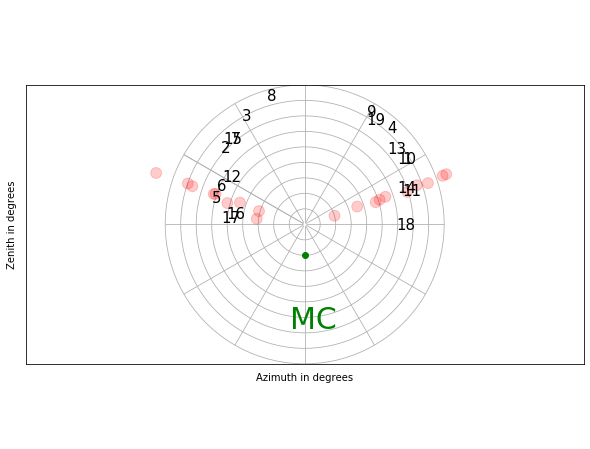

In [34]:
import mpl_toolkits.axisartist.angle_helper as angle_helper
from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist import SubplotHost, ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D

fig = plt.figure(figsize=(10,8))

# PolarAxes.PolarTransform takes radian. However, we want our coordinate
# system in degree
tr = Affine2D().scale(np.pi/180., 1.).translate(+np.pi/2.,0) + PolarAxes.PolarTransform()

# polar projection, which involves cycle, and also has limits in
# its coordinates, needs a special method to find the extremes
# (min, max of the coordinate within the view).

# 20, 20 : number of sampling points along x, y direction
n = 20
extreme_finder = angle_helper.ExtremeFinderCycle(n, n,
                                                 lon_cycle=360,
                                                 lat_cycle=None,
                                                 lon_minmax=None,
                                                 lat_minmax=(-90, 90),
                                                 )

grid_locator1 = angle_helper.LocatorDMS(12)
# Find a grid values appropriate for the coordinate (degree,
# minute, second).

tick_formatter1 = angle_helper.FormatterDMS()
# And also uses an appropriate formatter.  Note that,the
# acceptable Locator and Formatter class is a bit different than
# that of mpl's, and you cannot directly use mpl's Locator and
# Formatter here (but may be possible in the future).

grid_helper = GridHelperCurveLinear(tr,
                                    extreme_finder=extreme_finder,
                                    grid_locator1=grid_locator1,
                                    tick_formatter1=tick_formatter1
                                    )

ax1 = SubplotHost(fig, 1, 1, 1, grid_helper=grid_helper)

# make ticklabels of right and top axis visible.
ax1.axis["right"].major_ticklabels.set_visible(True)
ax1.axis["top"].major_ticklabels.set_visible(True)

# let right axis shows ticklabels for 1st coordinate (angle)
ax1.axis["right"].get_helper().nth_coord_ticks = 0
# let bottom axis shows ticklabels for 2nd coordinate (radius)
ax1.axis["bottom"].get_helper().nth_coord_ticks = 1

fig.add_subplot(ax1)

# A parasite axes with given transform
ax2 = ParasiteAxesAuxTrans(ax1, tr, "equal")
# note that ax2.transData == tr + ax1.transData
# Anything you draw in ax2 will match the ticks and grids of ax1.
ax1.parasites.append(ax2)
# intp = cbook.simple_linear_interpolation
#ax2.plot(intp(np.array([0, 30]), 50),
#         intp(np.array([10., 10.]), 50),
#         linewidth=2.0)

for telescope in array.telescopes:
    x = np.rad2deg(telescope.az.value) * np.cos(telescope.alt.value)
    y = np.rad2deg(telescope.alt.value)

    x1=np.rad2deg(telescope.az.value - np.pi) * np.sin(telescope.alt.value)
    y1=np.rad2deg(-telescope.alt.value * np.cos((telescope.az.value - np.pi)))

    x2 = np.rad2deg(telescope.az.value)*np.sin(telescope.zenith.value)
    y2 = -np.rad2deg(telescope.zenith.value)*np.cos(telescope.az.value)

    print(telescope.id, x, x1, x2)
    print(telescope.id, y, y1, y2)

    circle = plt.Circle((x2, y2),
                        radius=7/2,
                        color="red",
                        alpha=0.2,
                        )
    ax1.add_artist(circle)
    #point = ax1.scatter(x, y, c="b", s=20, zorder=10, transform=ax2.transData)
    ax2.annotate(telescope.id, (x, y), fontsize=15, xytext=(4, 4), textcoords='offset pixels')

ax1.scatter(0, -20, label="MC", zorder=20, c="green")
ax2.annotate("MC", (az.value, alt.value),
             fontsize=30, xytext=(-15, 4),
             textcoords='offset pixels',
             zorder=30, color="green")

ax1.set_xlim(-180, 180)
ax1.set_ylim(-90, 90)
ax1.set_aspect(1.)
ax1.grid(True, zorder=0)
ax1.set_xlabel("Azimuth in degrees", fontsize=20)
ax1.set_ylabel("Zenith in degrees", fontsize=20)

plt.savefig("test1.png")
plt.show()